In [1]:
import numpy as np

In [2]:
X = np.array([[0,0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

class NeuralNetwork:
    def __init__(self, layer_1: int, layer_2: int, output_size: int):
        self.weights_1 = np.random.uniform(low=0.0, high=0.5, size=(layer_1, layer_2))
        self.weights_2 = np.random.uniform(low=0.0, high=0.5, size=(layer_2, output_size))
        self.biases_1 = np.zeros((1, layer_2))
        self.biases_2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def train(self, X, y, learning_rate, epochs, verbose:bool=False):
        SSR = []
        MAE = []
        for epoch in range(epochs):
            total_error = 0
            total_error_squared = 0
            for inputs, label in zip(X, y):
                inputs = inputs.reshape(1, -1)
                forward_1 = inputs @ self.weights_1 + self.biases_1
                activated_1 = self.sigmoid(forward_1)
                forward_2 = activated_1 @ self.weights_2 + self.biases_2
                output = self.sigmoid(forward_2)[0][0]

                error = label - output
                total_error += np.sum(error)
                total_error_squared += np.sum(error ** 2)

                bias_2_delta = -2 * error * self.sigmoid_derivative(forward_2)
                bias_1_delta = bias_2_delta @ self.weights_2.T * self.sigmoid_derivative(forward_1)
                weights_2_delta = activated_1.T @ bias_2_delta
                weights_1_delta = inputs.T @ bias_1_delta
                    
                self.biases_2 -= learning_rate * bias_2_delta
                self.weights_2 -= learning_rate * weights_2_delta
                self.biases_1 -= learning_rate * bias_1_delta
                self.weights_1 -= learning_rate * weights_1_delta

            SSR.append(total_error_squared)
            MAE.append(total_error)
            
            if verbose:
                print(f"Epoch {epoch+1}/{epochs},\n"
                      f"Total Error: {total_error_squared},\n"
                      f"absolute_error: {total_error}\n"
                      f"{print('='*100)}")  
        return SSR, MAE
            
                 
    def predict(self, inputs):
        inputs = inputs.reshape(1, -1)
        forward_1 = inputs @ self.weights_1 + self.biases_1
        activated_1 = self.sigmoid(forward_1)
        forward_2 = activated_1 @ self.weights_2 + self.biases_2
        output = self.sigmoid(forward_2)[0][0]
        return output


In [10]:
nn = NeuralNetwork(2, 1, 1)

SSR, MAE = nn.train(X, y, 0.5, 1000, verbose=True)

Epoch 1/1000,
Total Error: 1.0880813438405832,
absolute_error: -0.10801422275683414
None
Epoch 2/1000,
Total Error: 1.08680704485569,
absolute_error: -0.07820234626731026
None
Epoch 3/1000,
Total Error: 1.086067775184184,
absolute_error: -0.056335772567796094
None
Epoch 4/1000,
Total Error: 1.0856125861652737,
absolute_error: -0.04031007170934808
None
Epoch 5/1000,
Total Error: 1.0853072143020372,
absolute_error: -0.028567574006363783
None
Epoch 6/1000,
Total Error: 1.0850802798516634,
absolute_error: -0.019962815263886324
None
Epoch 7/1000,
Total Error: 1.0848940458452194,
absolute_error: -0.013656081293376143
None
Epoch 8/1000,
Total Error: 1.0847286870462352,
absolute_error: -0.009032631658218104
None
Epoch 9/1000,
Total Error: 1.0845738753079996,
absolute_error: -0.005642625551251612
None
Epoch 10/1000,
Total Error: 1.0844242952229148,
absolute_error: -0.003156880833489639
None
Epoch 11/1000,
Total Error: 1.0842772617240206,
absolute_error: -0.00133444727649501
None
Epoch 12/1000,


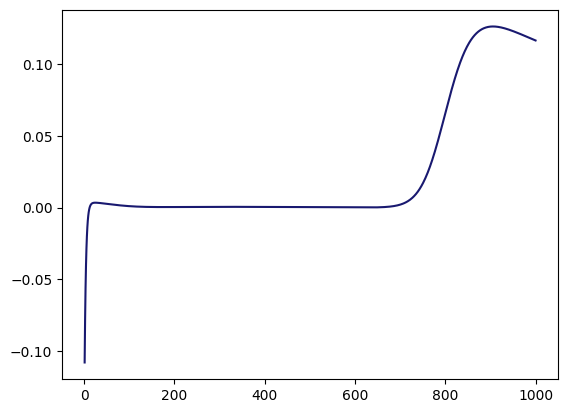

In [12]:
import matplotlib.pyplot as plt

e = range(1, len(SSR) + 1)
plt.plot(e, SSR, color='midnightblue')
plt.show()